In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:

#df1 includes both active and inactive players
df1 = pd.read_csv('NBA_AllTimeLeader.csv')
#df2 includes only active players
df2 = pd.read_csv('NBA_AllTimeLeader_Active.csv')
#df3 includes player data such as year, position and height
df3 = pd.read_csv("player_data.csv")
df3 = df3.rename(columns = {"name":"PLAYER"})
hof = []
with open('HOF.csv', 'r') as f:
    for line in f:
        hof.append(line.strip())

In [3]:
#drop duplicates from merging pts, ast, steal, reb, blk all-times
df1 = df1.drop_duplicates(subset='PLAYER')
df2 = df2.drop_duplicates(subset='PLAYER')

In [4]:
df1['HOF'] = [1.0 if player in hof else 0.0 for player in df1['PLAYER']]

In [5]:
df1['GP'] = pd.to_numeric(df1['GP'].str.replace(',',''))
df2['GP'] = pd.to_numeric(df2['GP'].str.replace(',',''))

In [6]:
df1 = df1.replace('-', np.NaN)

In [7]:
df1

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%,HOF
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,2975,9394,17440,5660,1160,3189,2527,55.9,59.2,1.0
1,2,Karl Malone,1476,54852,36928,13528,26210,51.6,85,310,...,3562,11406,14968,5248,2085,1145,4524,51.8,57.7,1.0
2,3,LeBron James,1325,50605,35757,13051,25900,50.4,2020,5856,...,1548,8290,9838,9799,2092,994,4646,54.3,58.7,0.0
3,4,Kobe Bryant,1346,48643,33643,11719,26200,44.7,1827,5546,...,1499,5548,7047,6306,1944,640,4010,48.2,55.0,1.0
4,5,Michael Jordan,1072,41010,32292,12192,24537,49.7,581,1778,...,1668,5004,6672,5633,2514,893,2924,50.9,56.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,424,Trae Young,229,7603,5578,1786,4117,43.4,566,1623,...,152,748,900,2043,213,38,957,50.3,57.5,0.0
5474,227,Kristaps Porzingis,304,9445,5694,2057,4655,44.2,552,1546,...,527,1849,2376,455,212,577,499,50.1,54.6,0.0
5477,231,Keon Clark,353,7973,2882,1179,2359,50.0,1,19,...,655,1441,2096,322,184,571,470,50.0,53.1,0.0
5489,242,Jawann Oldham,329,5241,1455,608,1269,47.9,0,3,...,431,922,1353,162,97,546,362,47.9,50.4,0.0


In [8]:
df2

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%,HOF
0,1,LeBron James,1325,50605,35757,13051,25900,50.4,2020,5856,...,1548,8290,9838,9799,2092,994,4646,54.3,58.7,0
1,2,Carmelo Anthony,1218,42471,27736,9923,22205,44.7,1647,4636,...,1944,5687,7631,3378,1196,607,3016,48.4,54.2,0
2,3,Kevin Durant,908,33333,24567,8388,16934,49.5,1696,4421,...,642,5779,6421,3811,989,1005,2847,54.5,61.5,0
3,4,James Harden,903,31140,22587,6667,15040,44.3,2509,6918,...,710,4290,5000,5980,1403,493,3385,52.7,61.1,0
4,5,Russell Westbrook,970,33719,22384,7971,18211,43.8,1099,3592,...,1615,5555,7170,8292,1656,299,4018,46.8,52.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Tyus Jones,408,7342,2359,911,2108,43.2,243,705,...,91,599,690,1476,401,33,300,49.0,52.1,0
317,34,Kristaps Porzingis,304,9445,5694,2057,4655,44.2,552,1546,...,527,1849,2376,455,212,577,499,50.1,54.6,0
613,45,Ben Simmons,275,9326,4382,1784,3188,56.0,5,34,...,523,1694,2217,2127,464,199,925,56.0,57.9,0
615,47,Trae Young,230,7639,5609,1796,4144,43.3,568,1631,...,157,750,907,2053,215,38,964,50.2,57.4,0


In [9]:
#Exclude active players because they 
#can't be in Hall of Fame until retired
df = df1[~df1.PLAYER.isin(df2.PLAYER)]
df = df.merge(df3, how='inner', on='PLAYER')

In [10]:
train = df.copy()
print(train.isna().sum())

#               0
PLAYER          0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3PM           199
3PA           199
3P%           199
FTM             0
FTA             0
FT%             0
OREB          106
DREB          106
REB             0
AST             0
STL           106
BLK           106
TOV           175
EFG%            0
TS%             0
HOF             0
year_start      0
year_end        0
position        0
height          0
weight          0
birth_date      0
college        78
dtype: int64


In [11]:
for index, value in train.isna().sum().drop('college').items():
    if value > 0:
        train[index] = train[index].fillna(train[index].median())

In [12]:
print(train.isna().sum())

#              0
PLAYER         0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3PM            0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
EFG%           0
TS%            0
HOF            0
year_start     0
year_end       0
position       0
height         0
weight         0
birth_date     0
college       78
dtype: int64


In [13]:
train.shape

(1162, 31)

In [14]:
train = train.drop(columns=['PLAYER', '#', 'college', 'position', 'height', 'weight', 'birth_date'])
train = train.astype('float32')

In [15]:
#unused for now
def normalize(df) :
    x = df.values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=df.columns)

In [16]:
#train = normalize(train)

In [17]:
corr = train.drop(columns = ['HOF']).corrwith(train['HOF']).abs().sort_values(ascending=False)

In [18]:
corr

FTA           0.593022
FTM           0.587085
PTS           0.536683
FGM           0.527158
FGA           0.525864
REB           0.452217
MIN           0.437756
AST           0.367372
TOV           0.316167
year_start    0.312356
GP            0.296621
DREB          0.279891
year_end      0.261033
STL           0.254657
BLK           0.220354
OREB          0.219234
FT%           0.074505
FG%           0.059484
TS%           0.058962
EFG%          0.046602
3P%           0.014372
3PM           0.011327
3PA           0.003557
dtype: float64

<BarContainer object of 23 artists>

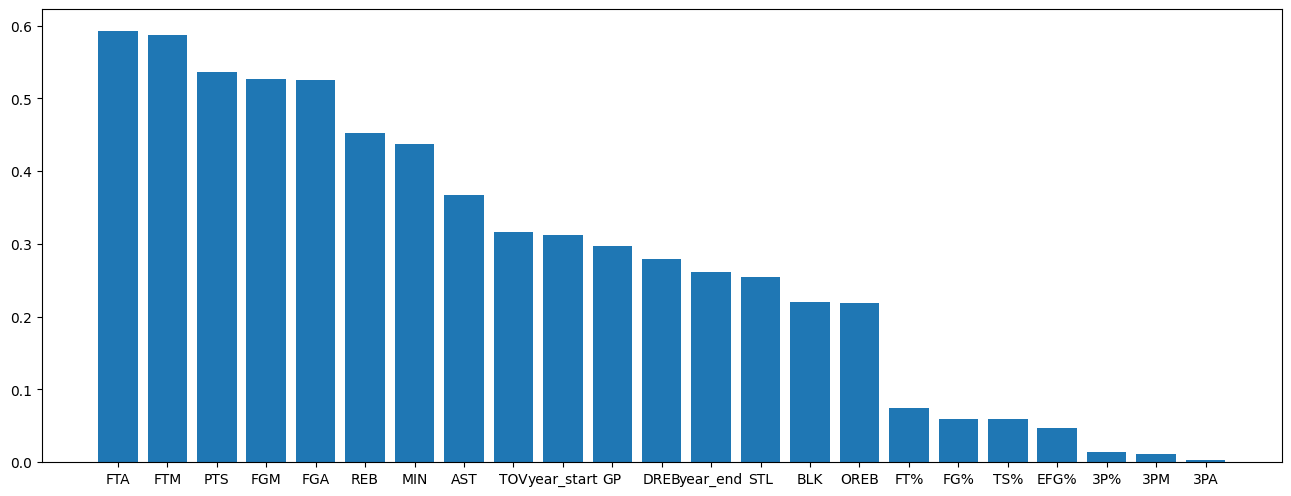

In [19]:
plt.figure(figsize=(16, 6), dpi=100)
plt.bar(x=corr.index, height=corr)

In [20]:
train = train.drop(columns = corr.index[-7:])

In [21]:
train = train.drop(columns = ['OREB', 'DREB'])

In [22]:
training_set = train.sample(frac=0.7, random_state=25)
training_set.head()

,GP,MIN,PTS,FGM,FGA,FTM,FTA,REB,AST,STL,BLK,TOV,HOF,year_start,year_end
490,840.0,19917.0,7712.0,2663.0,6507.0,1463.0,1679.0,2269.0,3394.0,1133.0,98.0,1556.0,0.0,1995.0,2008.0
847,506.0,9866.0,4366.0,1792.0,3580.0,778.0,1210.0,2276.0,504.0,223.0,174.0,599.0,0.0,1996.0,2004.0
801,965.0,14712.0,4666.0,1902.0,4201.0,849.0,1069.0,3991.0,622.0,261.0,285.0,777.0,0.0,1986.0,2000.0
712,620.0,14395.0,5400.0,1993.0,4560.0,1373.0,1744.0,1318.0,3080.0,910.0,58.0,1240.0,0.0,1982.0,1991.0
1037,629.0,13580.0,3003.0,1163.0,2728.0,604.0,1036.0,2563.0,798.0,435.0,323.0,674.0,0.0,2003.0,2013.0


In [23]:
dev_set = train.drop(training_set.index)
dev_set.head()

,GP,MIN,PTS,FGM,FGA,FTM,FTA,REB,AST,STL,BLK,TOV,HOF,year_start,year_end
0,1560.0,57446.0,38387.0,15837.0,28307.0,6712.0,9304.0,17440.0,5660.0,1160.0,3189.0,2527.0,1.0,1970.0,1989.0
2,1346.0,48643.0,33643.0,11719.0,26200.0,8378.0,10011.0,7047.0,6306.0,1944.0,640.0,4010.0,1.0,1997.0,2016.0
8,1303.0,50000.0,27313.0,10976.0,24272.0,5356.0,7999.0,16279.0,2398.0,864.0,1771.0,1358.0,1.0,1969.0,1984.0
10,1040.0,43886.0,26710.0,9508.0,19620.0,7694.0,9185.0,7804.0,9887.0,77.0,4.0,928.0,1.0,1961.0,1974.0
14,1270.0,46471.0,26395.0,10513.0,23930.0,5369.0,6589.0,8007.0,6114.0,476.0,117.0,204.0,1.0,1963.0,1978.0


In [24]:
train_set_y = training_set["HOF"]
train_set_x = training_set.drop(columns = ["HOF"])
dev_set_y = dev_set["HOF"]
dev_set_x = dev_set.drop(columns = ["HOF"])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
logreg = LogisticRegression()
train_X = train_set_x.to_numpy()
train_Y = train_set_y.to_numpy()
logreg.fit(train_X, train_Y)
train_y_pred = logreg.predict(train_X)
f1_score(train_Y, train_y_pred)

C:\Users\nahte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6708860759493671

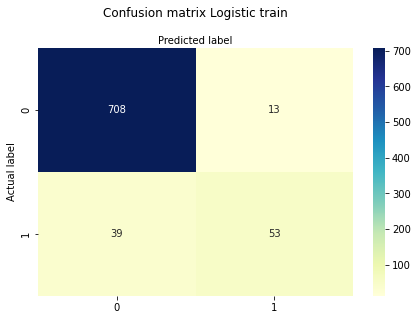

In [26]:
cnf_matrix = metrics.confusion_matrix(train_Y, train_y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Logreg.png')

In [27]:
test_X = dev_set_x.to_numpy()
test_Y = dev_set_y.to_numpy()
test_y_pred = logreg.predict(test_X)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_Y, test_y_pred)

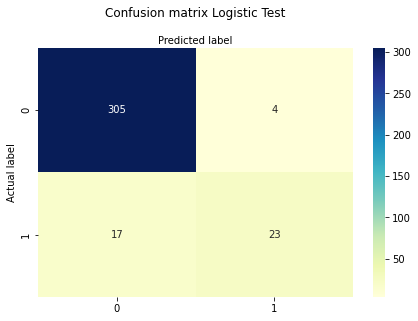

In [28]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Logreg.png')

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, max_features = 3, random_state=0)
clf.fit(train_X, train_Y)
train_y_pred = clf.predict(train_X)
f1_score(train_Y, train_y_pred)

0.994535519125683

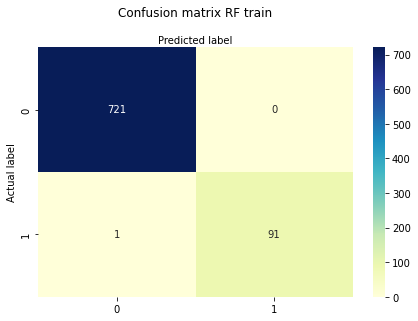

In [30]:
cnf_matrix = metrics.confusion_matrix(train_Y, train_y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('randomforest.png')

In [31]:
test_y_pred = clf.predict(test_X)
f1_score(test_Y, test_y_pred)

0.6944444444444444

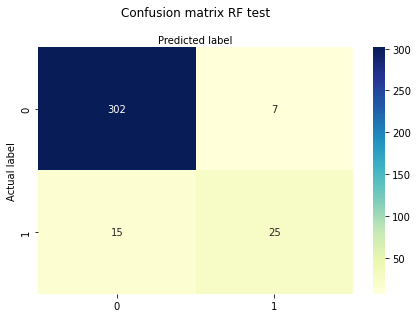

In [32]:
cnf_matrix = metrics.confusion_matrix(test_Y, test_y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('randomforest.png')

In [33]:
X_error = dev_set[test_y_pred != test_Y]

In [34]:
X_error

,GP,MIN,PTS,FGM,FGA,FTM,FTA,REB,AST,STL,BLK,TOV,HOF,year_start,year_end
31,1335.0,47117.0,21813.0,8708.0,18698.0,3265.0,4480.0,5269.0,8966.0,2445.0,285.0,3030.0,1.0,2017.0,2018.0
41,1107.0,33921.0,20049.0,7378.0,15749.0,5066.0,6274.0,6703.0,2283.0,885.0,627.0,2549.0,0.0,1982.0,1998.0
54,1026.0,34603.0,19015.0,7057.0,14973.0,4663.0,5644.0,3349.0,6453.0,1206.0,236.0,3493.0,0.0,1979.0,1991.0
62,923.0,27730.0,18458.0,7201.0,14865.0,3664.0,4944.0,4578.0,2871.0,687.0,296.0,2306.0,0.0,1982.0,1994.0
65,938.0,30658.0,18381.0,6709.0,15413.0,3882.0,5202.0,5276.0,4161.0,1136.0,807.0,2029.0,1.0,1998.0,2012.0
82,971.0,30118.0,17335.0,6830.0,12334.0,3634.0,4554.0,7122.0,1670.0,344.0,1690.0,1893.0,1.0,1981.0,1993.0
87,893.0,31936.0,17189.0,6209.0,12581.0,4466.0,5591.0,7592.0,1795.0,730.0,932.0,1807.0,1.0,2004.0,2016.0
89,1026.0,34778.0,17137.0,6345.0,13126.0,4228.0,5498.0,6169.0,4252.0,1248.0,576.0,2459.0,1.0,1995.0,2013.0
93,913.0,35268.0,16712.0,6076.0,14294.0,3456.0,4298.0,3724.0,3664.0,1294.0,399.0,2450.0,0.0,1993.0,2005.0
156,875.0,31202.0,14053.0,5722.0,13249.0,2609.0,3730.0,9618.0,2497.0,67.0,39.0,928.0,1.0,1963.0,1974.0


## Predict whether active player will be in HOF

In [35]:
#active = normalize(df2[train_set_x.columns])
active = df2.merge(df3, how='inner', on='PLAYER').drop(columns=['PLAYER', '#', 'college', 'position', 'height', 'weight', 'birth_date', 'HOF', 'OREB', 'DREB'])
active = active.drop(columns = corr.index[-7:])
active

,GP,MIN,PTS,FGM,FGA,FTM,FTA,REB,AST,STL,BLK,TOV,year_start,year_end
0,1325,50605,35757,13051,25900,7635,10406,9838,9799,2092,994,4646,2004,2018
1,1218,42471,27736,9923,22205,6243,7673,7631,3378,1196,607,3016,2004,2018
2,908,33333,24567,8388,16934,6095,6908,6421,3811,989,1005,2847,2008,2018
3,903,31140,22587,6667,15040,6744,7851,5000,5980,1403,493,3385,2010,2018
4,970,33719,22384,7971,18211,5343,6782,7170,8292,1656,299,4018,2009,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,448,9654,2453,843,2175,405,508,1399,662,307,99,377,2014,2017
135,408,7342,2359,911,2108,294,357,690,1476,401,33,300,2016,2018
136,304,9445,5694,2057,4655,1028,1263,2376,455,212,577,499,2016,2018
137,275,9326,4382,1784,3188,809,1354,2217,2127,464,199,925,2018,2018


In [36]:
print(active.isna().sum())
active_pred = logreg.predict(active)

GP            0
MIN           0
PTS           0
FGM           0
FGA           0
FTM           0
FTA           0
REB           0
AST           0
STL           0
BLK           0
TOV           0
year_start    0
year_end      0
dtype: int64


C:\Users\nahte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [37]:
print(list(zip(df2['PLAYER'], active_pred)))

[('LeBron James', 1.0), ('Carmelo Anthony', 1.0), ('Kevin Durant', 1.0), ('James Harden', 1.0), ('Russell Westbrook', 1.0), ('Chris Paul', 1.0), ('LaMarcus Aldridge', 1.0), ('Dwight Howard', 1.0), ('Stephen Curry', 0.0), ('DeMar DeRozan', 1.0), ('Damian Lillard', 0.0), ('Rudy Gay', 0.0), ('Lou Williams', 0.0), ('Paul George', 0.0), ('Kyle Lowry', 0.0), ('Paul Millsap', 0.0), ('Kemba Walker', 0.0), ('Brook Lopez', 0.0), ('Blake Griffin', 0.0), ('Anthony Davis', 1.0), ('Andre Iguodala', 0.0), ('Bradley Beal', 0.0), ('Thaddeus Young', 0.0), ('Mike Conley', 0.0), ('Kevin Love', 0.0), ('Kyrie Irving', 0.0), ('Giannis Antetokounmpo', 1.0), ('Jeff Green', 0.0), ('Jrue Holiday', 0.0), ('Al Horford', 0.0), ('DeMarcus Cousins', 1.0), ('Derrick Rose', 0.0), ('Goran Dragic', 0.0), ('Klay Thompson', 0.0), ('Eric Gordon', 0.0), ('John Wall', 1.0), ('Nikola Vucevic', 0.0), ('Trevor Ariza', 0.0), ('Jimmy Butler', 1.0), ('Tobias Harris', 0.0), ('Gordon Hayward', 0.0), ('Kawhi Leonard', 0.0), ('Danilo G